In [1]:
import autograd.numpy as np
from autograd import grad
from autograd.scipy.integrate import odeint
from autograd.builtins import tuple
from autograd.misc.optimizers import adam

import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline  

import time
from tqdm import tqdm

In [2]:
def rhs(y, t, params): 
    u, v, w = params
    return -y + np.square(0.3 - u) + np.square(-0.2 + v) + np.square(0.7 - w)

In [3]:
trueParams = (0.3, 0.2, 0.7)
tspan      = np.linspace(0, 100, 101) / 20
true_y     = odeint(rhs, y0=3, t=tspan, args=(trueParams, ))

In [4]:
initParams = (0.0, 0.0, 0.0)
pred_y     = odeint(rhs, y0=3, t=tspan, args=(initParams, ))

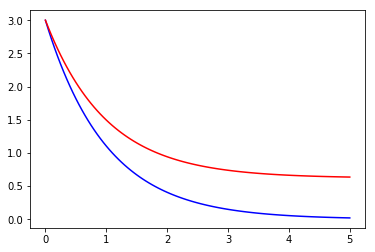

In [5]:
plt.plot(tspan, true_y, 'b-')
plt.plot(tspan, pred_y, 'r-')

In [6]:
def odeloss(params, epoch):
    pred_y = odeint(rhs, 3, tspan, tuple((params, )))
    return np.square(true_y - pred_y).mean()

In [7]:
nIterations = 100
pbar        = tqdm(range(nIterations))

def callback(params, epoch, gradients):
    pred_y    = odeint(rhs, 3, tspan, tuple((params, )))
    trainloss = np.square(true_y - pred_y).mean()
    
    params    = [round(float(p), 5) for p in params]
    
    pbar.set_description('trainloss: {:.5f} | params: {}'.format(trainloss, params))
    pbar.update(1)

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
print('trueParams', trueParams)
optParams = adam(grad(odeloss), initParams, num_iters=nIterations, callback=callback, step_size=0.01)

trueParams (0.3, 0.2, 0.7)


trainloss: 0.00260 | params: [0.29895, 0.20383, 0.45318]: 100%|██████████| 100/100 [03:05<00:00,  1.85s/it]

In [9]:
pred_y     = odeint(rhs, y0=3, t=tspan, args=(optParams, ))

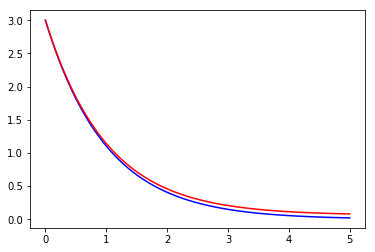

In [10]:
plt.close('all')
plt.plot(tspan, true_y, 'b-')
plt.plot(tspan, pred_y, 'r-')